In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError 
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Accuracy





In [3]:
#df = pd.read_csv('AllWeather.csv', index_col='sno')
df = pd.read_csv('finals.csv', index_col='sno')
##To plot sample data
#print(df.head())
#df.plot(figsize=(10, 5))
#####
#print(df[:25])
df

,station name,station number,Date,Hour,Temp,dew point,humidity,precipitation,snow depth,wind direction,wind speed,peak wind gust,air pressure,one hour sunshine total(minutes),weather condition code
sno,,,,,,,,,,,,,,,
1,gulmarg,42026,01-01-2023,0,-2.9,-28.4,12,0.0,0,202,5.4,0,1021.2,0,3
2,gulmarg,42026,01-01-2023,1,-2.8,-26.7,14,0.0,0,204,5.4,0,1021.1,0,1
3,gulmarg,42026,01-01-2023,2,-2.8,-25.2,16,0.0,0,205,4.7,0,1021.3,0,1
4,gulmarg,42026,01-01-2023,3,-7.4,-10.7,77,0.0,0,0,0.0,0,981.5,0,1
5,gulmarg,42026,01-01-2023,4,-2.6,-24.4,17,0.0,0,204,4.7,0,1022.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315356,bhubaneswar,42971,31-12-2023,19,17.0,15.0,88,0.0,0,0,0.0,0,1017.0,0,5
315357,bhubaneswar,42971,31-12-2023,20,16.0,15.0,94,0.0,0,280,3.6,0,1016.0,0,5
315358,bhubaneswar,42971,31-12-2023,21,18.0,16.7,92,0.0,0,0,0.0,0,1015.5,0,5


<Axes: xlabel='sno'>

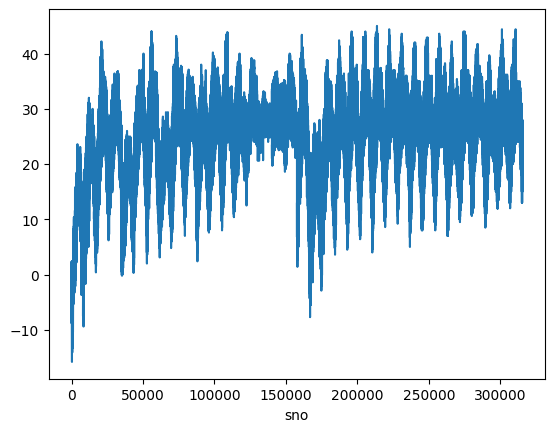

In [4]:
#Plotting Temp Values
temp = df['Temp']
temp.plot()
#plt.show()
#######

#[[[1],[2],[3],[4],[5]]] [6] we give 1 to 5 hours and we get 6th hour value
# [[2,3,4,5,6]] [7] we give 2 to 6 hours and we get 7th hour value
# [[3,4,5,6,7]] [8] we give 3 to 7 hours and we get 8th hour value 
#We predict the next value based on the previous 5 values

#Supervoised learning



In [5]:
def dt_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size]
        y.append(label)
    return np.array(X), np.array(y)

WINDOW_SIZE = 12
X, y = dt_to_X_y(temp, window_size=WINDOW_SIZE)
print(X.shape, y.shape)
#print(X[:5])
#print(y[:5])
print(len(X)*.8, len(y)*.1)
X_train, y_train = X[:int(len(X)*0.8)], y[:int(len(y)*0.8)]
X_val, y_val = X[int(len(X)*0.8):int(len(X)*0.9)], y[int(len(y)*0.8):int(len(y)*0.9)]
X_test, y_test = X[int(len(X)*0.9):], y[int(len(y)*0.9):]

#Print all shapes
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape) 
print(X_test.shape, y_test.shape)
#All  shape printed




(315348, 12, 1) (315348,)
252278.40000000002 31534.800000000003
(252278, 12, 1) (252278,)
(31535, 12, 1) (31535,)
(31535, 12, 1) (31535,)


In [6]:

###MOdel

model1 = Sequential()
model1.add(InputLayer(input_shape=(WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))

model1.summary()

#Model Cleckpoint

cp = ModelCheckpoint('model2/', save_best_only=True)

model1.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=["accuracy"])

history = model1.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[cp])

score = model1.evaluate(X_test, y_test)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3941/3942 [============================>.] - ETA: 0s - loss: 11.5562 - accuracy: 4.0044e-04

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


3942/3942 [==============================] - 73s 18ms/step - loss: 11.5544 - accuracy: 4.0035e-04 - val_loss: 1.9739 - val_accuracy: 0.0000e+00
Epoch 2/10
3940/3942 [============================>.] - ETA: 0s - loss: 1.9123 - accuracy: 3.9657e-04

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


3942/3942 [==============================] - 69s 17ms/step - loss: 1.9123 - accuracy: 3.9639e-04 - val_loss: 1.8039 - val_accuracy: 0.0000e+00
Epoch 3/10
3942/3942 [==============================] - 68s 17ms/step - loss: 1.8129 - accuracy: 4.0828e-04 - val_loss: 1.8684 - val_accuracy: 0.0000e+00
Epoch 4/10
3942/3942 [==============================] - ETA: 0s - loss: 1.7667 - accuracy: 4.0828e-04

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


3942/3942 [==============================] - 72s 18ms/step - loss: 1.7667 - accuracy: 4.0828e-04 - val_loss: 1.6957 - val_accuracy: 0.0000e+00
Epoch 5/10
3942/3942 [==============================] - 79s 20ms/step - loss: 1.7309 - accuracy: 3.9639e-04 - val_loss: 1.7184 - val_accuracy: 0.0000e+00
Epoch 6/10
3942/3942 [==============================] - 77s 20ms/step - loss: 1.7031 - accuracy: 3.8053e-04 - val_loss: 1.7501 - val_accuracy: 0.0000e+00
Epoch 7/10
3942/3942 [==============================] - 76s 19ms/step - loss: 1.6782 - accuracy: 4.0432e-04 - val_loss: 1.7137 - val_accuracy: 0.0000e+00
Epoch 8/10
3942/3942 [==============================] - 77s 20ms/step - loss: 1.6575 - accuracy: 3.8450e-04 - val_loss: 1.6971 - val_accuracy: 0.0000e+00
Epoch 9/10
3942/3942 [==============================] - 75s 19ms/step - loss: 1.6383 - accuracy: 3.9242e-04 - val_loss: 1.7055 - val_accuracy: 0.0000e+00
Epoch 10/10
986/986 [==============================] - 6s 6ms/step - loss: 1.3371 - acc

In [ ]:
print("Test Score= ", score[0])
print("Test Accuracy= ", score[1])
##Loading the model

model1 = load_model('model1/')

train_prdictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Prediction': train_prdictions, 'Actuals': y_train})
print(train_results)

plt.plot(train_results['Train Prediction'][:10])
plt.plot(train_results['Actuals'][:10]) 
plt.show()